In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
a = pd.read_csv(r'C:\Users\acer\Desktop\Data set\bcwis.csv', 
names = ["samplecode", "clump-thickness", "cell sizeuniformity", "cellshapeuniformity", "marginaladhesion", "singleepithelialcellsize", "barenuclei", "blandchromatin", "normalnucleoli", "mitoses", "class"])

In [20]:
a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   samplecode                699 non-null    int64  
 1   clump-thickness           699 non-null    int64  
 2   cell sizeuniformity       699 non-null    int64  
 3   cellshapeuniformity       699 non-null    int64  
 4   marginaladhesion          699 non-null    int64  
 5   singleepithelialcellsize  699 non-null    int64  
 6   barenuclei                683 non-null    float64
 7   blandchromatin            699 non-null    int64  
 8   normalnucleoli            699 non-null    int64  
 9   mitoses                   699 non-null    int64  
 10  class                     699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [21]:
a.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
samplecode,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump-thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
cell sizeuniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
cellshapeuniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginaladhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
singleepithelialcellsize,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
barenuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
blandchromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normalnucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


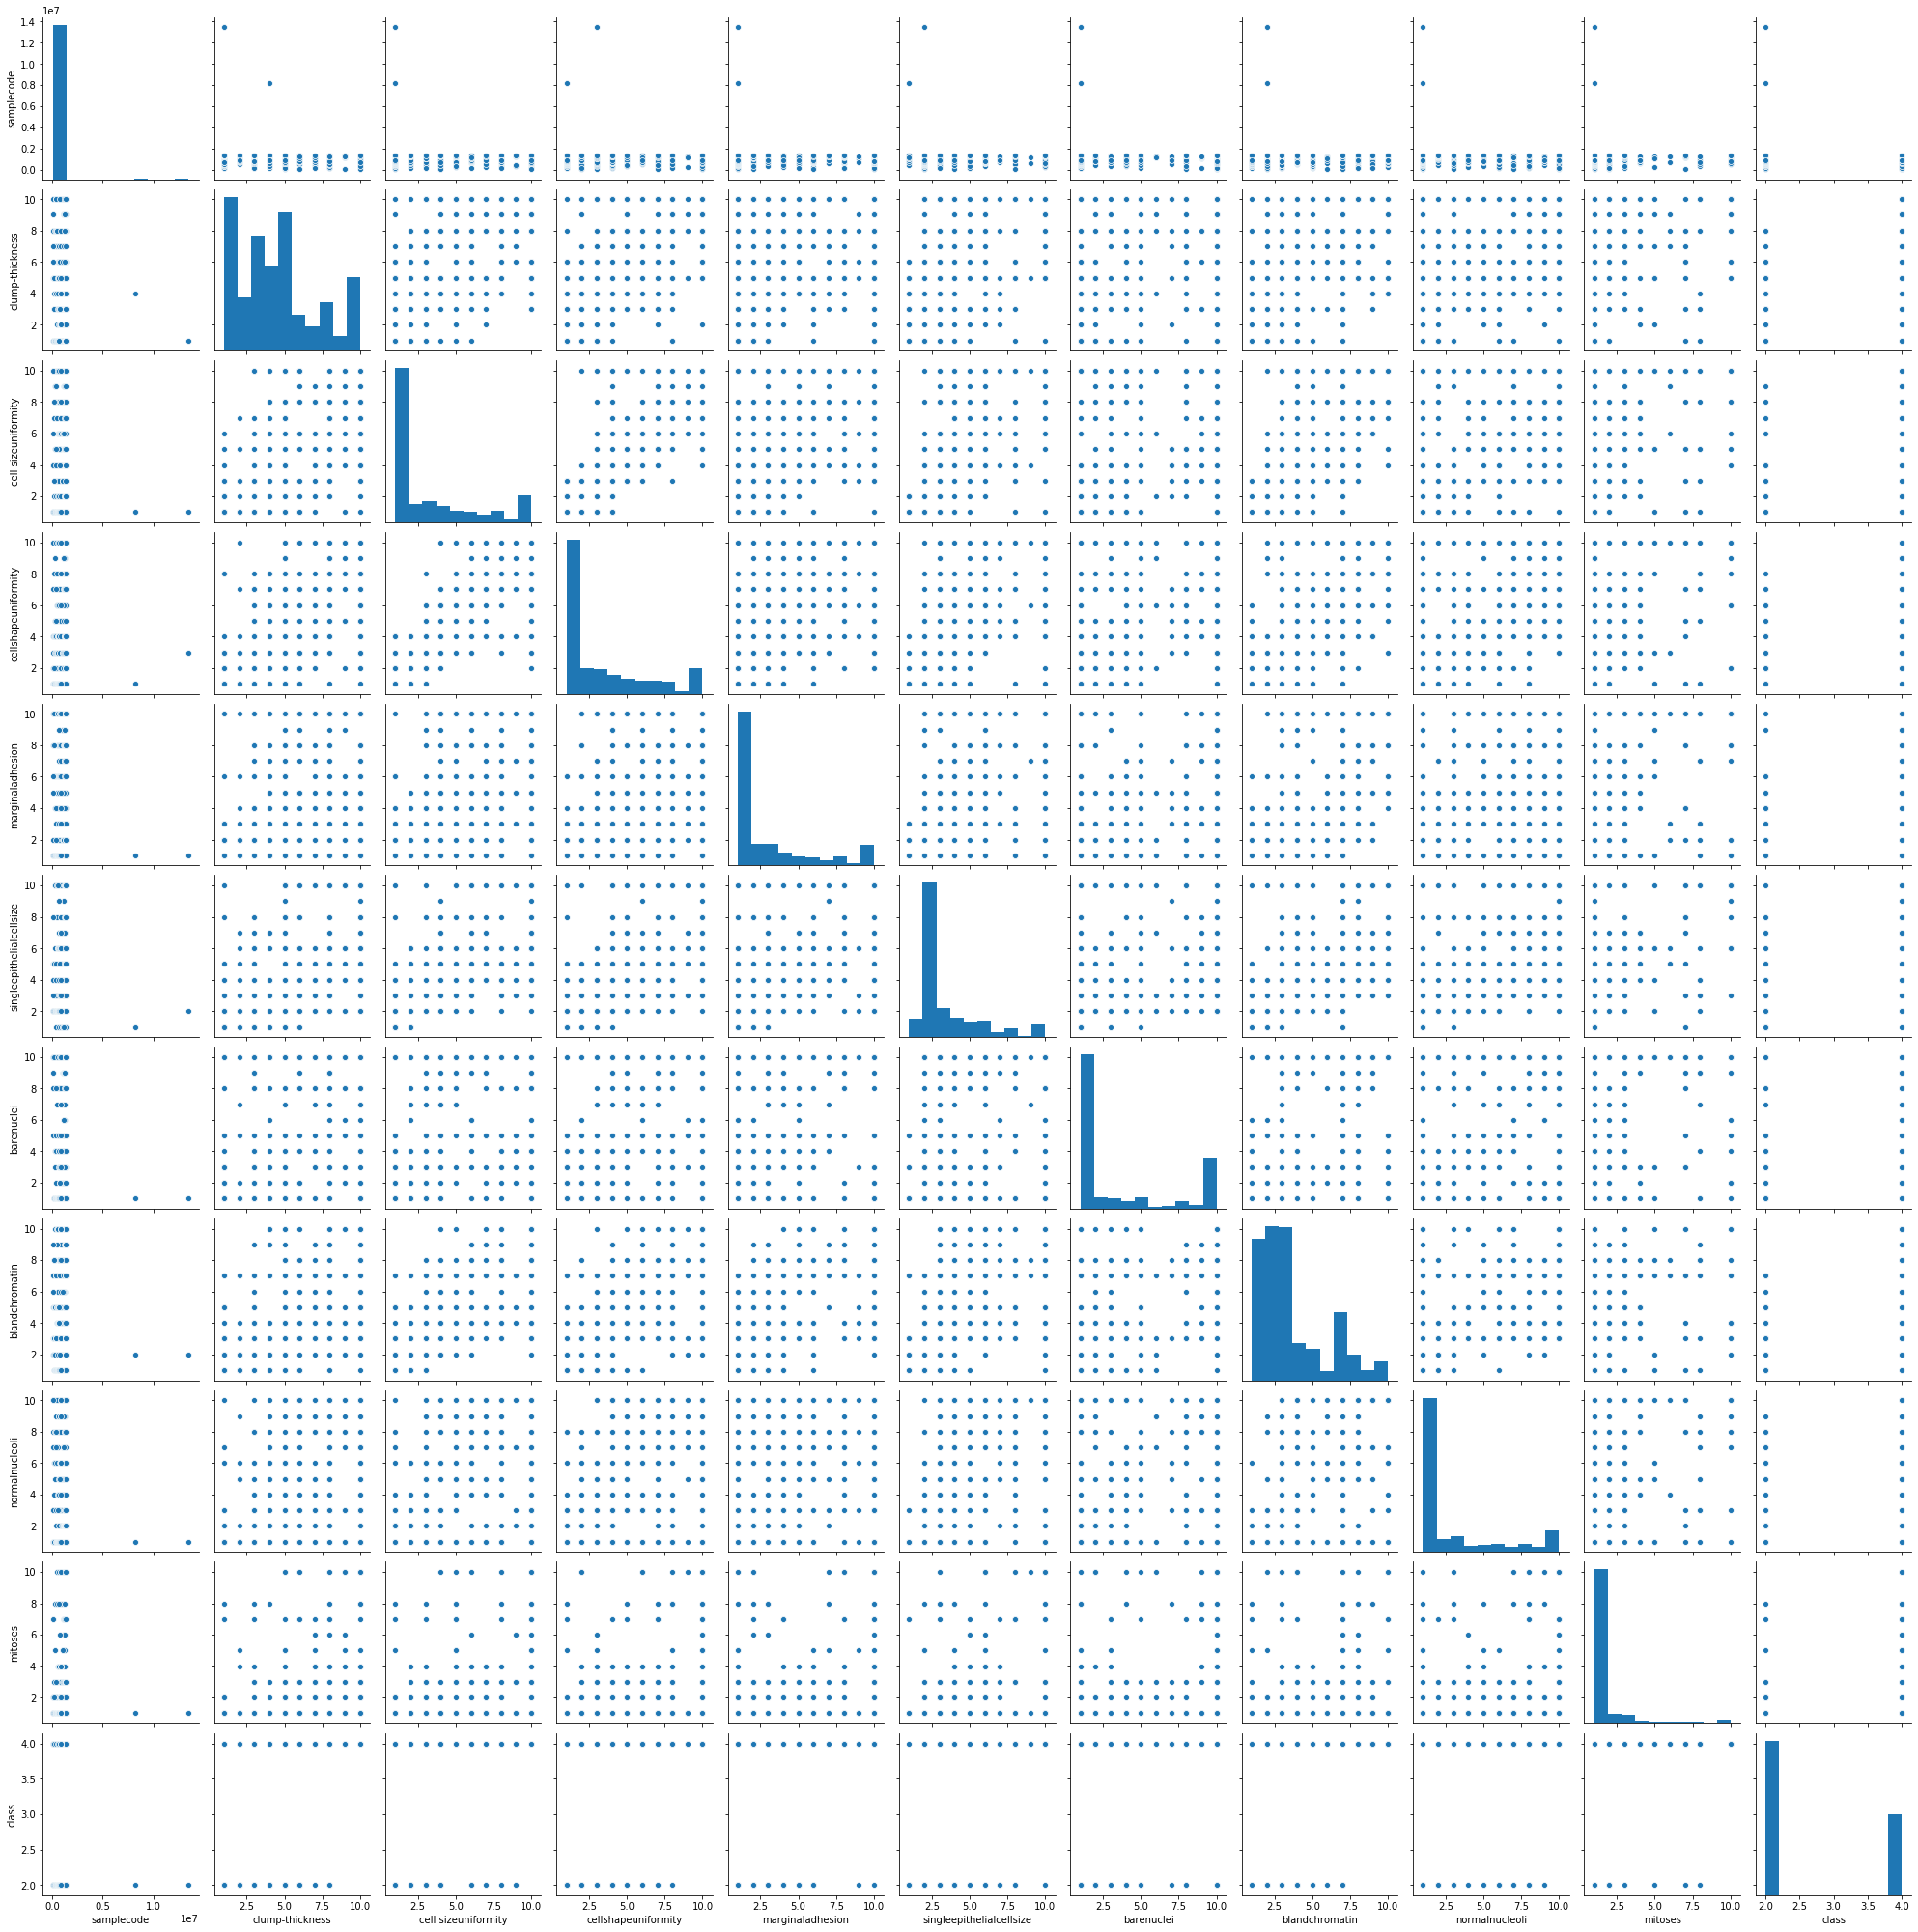

In [22]:
sns.pairplot(a)

In [23]:
a.shape

(699, 11)

In [45]:
a = a.drop("samplecode",axis=1)

In [46]:
#replace NaN by median
#dropped samplecode column
a.fillna(a.median(), inplace = True)

In [37]:
a

,clump-thickness,cell sizeuniformity,cellshapeuniformity,marginaladhesion,singleepithelialcellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [47]:
a.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clump-thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
cell sizeuniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
cellshapeuniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginaladhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
singleepithelialcellsize,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
barenuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
blandchromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normalnucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [48]:
from sklearn.model_selection import train_test_split
array = a.values
x= array[:, 0:9] # all rows and first 9 columns which are the attributes
y= array[:, 9]  # all rows and 10th column which is outcome 
test_size = 0.30 # taking 70:30 training and test set
seed = 7 # random number seeding for repeatability of code
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=test_size, random_state=seed)
type(x_train)


numpy.ndarray

In [49]:
#fit the model on 30%
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9523809523809523
[[133   4]
 [  6  67]]


In [52]:
# 95% score, dig it, something is wrong, I guess
# difference between mean and median is  not too much, not a skewed dataset
# in this case, if we drop column"sample code " after training the set,
# it shows error as sample code has huge values , so drop it before, also it does 
# not make any impact on the model, so dropping it before is better
# 95% score, dig it, something is wrong, I guess, still dig it further
# not getting guassian curves, but histograms are coming, FDE bandwidth is 0 error